**Dataset**
labeled datasset collected from twitter (Lab 1 - Hate Speech.tsv)

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>


**Evaluation metric**
macro f1 score

### Import used libraries

In [96]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install emoji
%pip install nltk
%pip install contractions
%pip install imblearn
%pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\PCCV\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\PCCV\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\PCCV\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\PCCV\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached gensim-4.3.3-cp311-cp311-win_amd64.whl.metadata (8.2 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
Using cached gensim-4.3.3-cp311-cp311-win_amd64.whl (24.0 MB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
Using cached scipy-1.13.1-cp311-cp311-win_amd64.whl (46.2 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\PCCV\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import emoji
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from gensim.models import Word2Vec, KeyedVectors, FastText
from sklearn.metrics import classification_report , f1_score 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC , LinearSVC
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Embedding, Dropout

### Load Dataset

In [2]:
df = pd.read_csv("Hate Speech.tsv", sep= "\t", index_col='id')
df.head(100)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦


In [3]:
df.count()

label    31535
tweet    31535
dtype: int64

In [4]:
df.columns

Index(['label', 'tweet'], dtype='object')

### Data splitting

In [5]:
x = df['tweet']
y = df['label']
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, stratify=y ,  random_state=88)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5 , stratify=y_temp ,random_state=88)

In [ ]:
# x_train = pd.DataFrame({'tweet': x_train})
# x_val = pd.DataFrame({'tweet': x_val})
# x_test = pd.DataFrame({'tweet': x_test})

In [6]:
x_train

id
21963                                               @user @user @user @user @user  this is a msu troll trick trying to get cj
25590                                                                                plz sign  #japan  #bullying #tweet4taiji
14707                               @user when yo brother is a rapist and you post his bail...  #shady look in a mirror bitch
26974                       @user why should this person be rehired?  shame on #claycountydevelopmentcorp #pamelaramseytaylor
14910                                                          dude sound like he believes his own lies.   #nobodybelievesyou
                                                                 ...                                                         
7726                                are you #black &amp; feel like â¦ are stomping on you? listen  #retweet #tampa #miamiâ¦
20662      the day will be whatever you make it! focus on the good and the bad will seem to disappear!ð  #positi

In [7]:
y_train

id
21963    0
25590    1
14707    0
26974    1
14910    0
        ..
7726     1
20662    0
13158    0
14249    0
6518     0
Name: label, Length: 22074, dtype: int64

In [8]:
print('xtrain shape : ' ,x_train.shape) 
print('ytrain shape : ' ,y_train.shape)
print('xval shape : ' ,x_val.shape)
print('yval shape : ' ,y_val.shape)
print('xtest shape : ' ,x_test.shape)
print('ytest shape : ' ,y_test.shape)


xtrain shape :  (22074,)
ytrain shape :  (22074,)
xval shape :  (4730,)
yval shape :  (4730,)
xtest shape :  (4731,)
ytest shape :  (4731,)


### EDA on training data

- check NaNs

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31535 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31535 non-null  int64 
 1   tweet   31535 non-null  object
dtypes: int64(1), object(1)
memory usage: 739.1+ KB


- check duplicates

In [10]:
df.duplicated().sum()

2404

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

- show a representative sample of data texts to find out required preprocessing steps

In [12]:
df['tweet'].head(10)

id
1                                               @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
2                          @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
3                                                                                                                                 bihday your majesty
4                                                                #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦
5                                                                                                              factsguide: society now    #motivation
6                                  [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7                                                                           @user camping tomorro

- check dataset balancing

In [13]:
print('train distribution : ' ,y_train.value_counts(normalize=True))
print('validation distribution : ' ,y_val.value_counts(normalize=True))
print('test distribution : ' ,y_test.value_counts(normalize=True))

train distribution :  label
0    0.929827
1    0.070173
Name: proportion, dtype: float64
validation distribution :  label
0    0.92981
1    0.07019
Name: proportion, dtype: float64
test distribution :  label
0    0.929825
1    0.070175
Name: proportion, dtype: float64


The data is imbalanced as : `Non Hate speech : 93%` - `Hate speech : 7%`

C:\Users\PCCV\AppData\Local\Temp\ipykernel_33684\2761711638.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = y_train.value_counts(normalize=True).index , y = y_train.value_counts(normalize=True) , palette='mako')


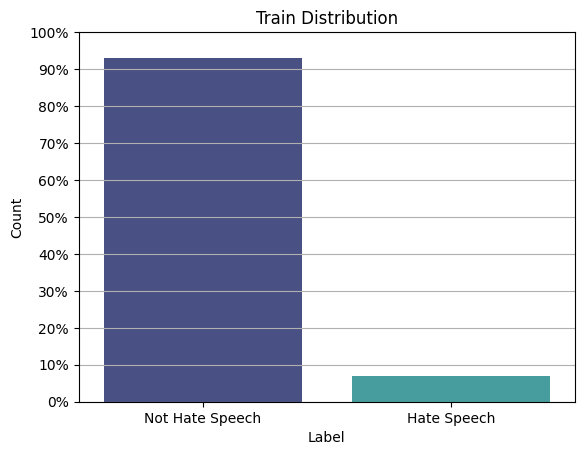

In [49]:
sns.barplot(x = y_train.value_counts(normalize=True).index , y = y_train.value_counts(normalize=True) , palette='mako')
plt.title('Train Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Hate Speech','Hate Speech'])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] , ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.grid(axis='y')
plt.show()

- Cleaning and Preprocessing are:
    - 1. Noise: Mentions, Hashtags, URLs
    - 2. Special Characters, Emojis, Non-ASCII
    - 3. Lowercasing & Punctuation
    - 4. Contractions & Normalizations 
    - 5. Tokenization & Remove stop-words
    - 6. lemmatization
    - 7. Class Imbalance

### Cleaning and Preprocessing

#### Building custom scikit-learn Transformers

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PCCV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PCCV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PCCV\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

    def fit(self, X, y=None):
        
        return self

    def transform(self, X):
        return X.apply(self.preprocess)

    def preprocess(self, text):
        
        text = text.lower()
        text = contractions.fix(text)
        text = re.sub(r'http\S+|www\S+|@\w+|#', '', text)
        text = emoji.replace_emoji(text, replace='')
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        words = text.split()
        words = [self.lemmatizer.lemmatize(w) for w in words if w not in self.stop_words]
        return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PCCV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PCCV\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
class VectorizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, method='tfidf', ngram_range=(1,1), min_df=1, max_df=1.0, embedding_model=None, cnn_model=None):
        self.method = method
        self.ngram_range = ngram_range
        self.min_df = min_df
        self.max_df = max_df
        self.embedding_model = embedding_model
        self.cnn_model = cnn_model
        self.vectorizer = None

    def fit(self, X, y=None):
        if self.method == 'bow':
            self.vectorizer = CountVectorizer(ngram_range=self.ngram_range, min_df=self.min_df, max_df=self.max_df)
            self.vectorizer.fit(X)
        elif self.method == 'tfidf':
            self.vectorizer = TfidfVectorizer(ngram_range=self.ngram_range, min_df=self.min_df, max_df=self.max_df)
            self.vectorizer.fit(X)
        elif self.method in ['word2vec', 'glove', 'fasttext']:
            sentences = [x.split() for x in X]
            if self.embedding_model is not None:
                if not self.embedding_model.wv.key_to_index:  # No vocab yet
                    self.embedding_model.build_vocab(sentences)
                else:
                    self.embedding_model.build_vocab(sentences, update=True)
                self.embedding_model.train(sentences, total_examples=len(sentences), epochs=10)

        elif self.method == 'cnn':
            pass
        return self

    def transform(self, X, y=None):
        if self.method in ['bow', 'tfidf']:
            return self.vectorizer.transform(X)
        
        elif self.method in ['word2vec', 'glove', 'fasttext']:
            return np.array([self._average_vector(text.split()) for text in X])

        elif self.method == 'cnn':
            if self.cnn_model is None:
                raise ValueError("CNN model must be provided for 'cnn' vectorization.")
            return self.cnn_model.predict(X)

    def _average_vector(self, tokens):
        valid_tokens = [token for token in tokens if token in self.embedding_model.wv]
        if not valid_tokens:
            return np.zeros(self.embedding_model.vector_size)
        return np.mean([self.embedding_model.wv[token] for token in valid_tokens], axis=0)


In [ ]:
class CNNFeatureExtractorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, max_vocab_size=5000, max_seq_len=100, embedding_dim=128):
        self.max_vocab_size = max_vocab_size
        self.max_seq_len = max_seq_len
        self.embedding_dim = embedding_dim
        self.tokenizer = Tokenizer(num_words=self.max_vocab_size)
        self.model = None

    def fit(self, X, y=None):
        self.tokenizer.fit_on_texts(X)
        sequences = self.tokenizer.texts_to_sequences(X)
        padded = pad_sequences(sequences, maxlen=self.max_seq_len)

        model = Sequential()
        model.add(Embedding(self.max_vocab_size, self.embedding_dim, input_length=self.max_seq_len))
        model.add(Conv1D(128, 5, activation='relu'))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(64, activation='relu'))
        self.model = model

        self.model.predict(padded, verbose=0)  
        return self

    def transform(self, X, y=None):
        sequences = self.tokenizer.texts_to_sequences(X)
        padded = pad_sequences(sequences, maxlen=self.max_seq_len)
        features = self.model.predict(padded, verbose=0)
        return features


### Modelling PipeLines

In [70]:
log_model = LogisticRegression(random_state=88)

pipeline1 = ImbPipeline(steps=[
    ('preprocessing', CustomTransformer()),       
    ('vectorizer', TfidfVectorizer()),            
    ('smote', SMOTE(random_state=88)),            
    ('model', log_model)               
])


pipeline1.fit(x_train, y_train)
pred1 = pipeline1.predict(x_val)


In [71]:
rf_model = RandomForestClassifier(n_estimators=100 , random_state=88)

pipeline2 = ImbPipeline(steps=[
    ('preprocessing', CustomTransformer()),       
    ('vectorizer', TfidfVectorizer()),            
    ('smote', SMOTE(random_state=88)),            
    ('model', rf_model)               
])


pipeline2.fit(x_train, y_train)
pred2 = pipeline2.predict(x_val)


In [64]:
svm_model = SVC(random_state=88)

pipeline = ImbPipeline(steps=[
    ('preprocessing', CustomTransformer()),       
    ('vectorizer', TfidfVectorizer()),            
    ('smote', SMOTE(random_state=88)),            
    ('model', svm_model)               
])


pipeline.fit(x_train, y_train)
pred3 = pipeline.predict(x_val)


#### Evaluation

In [65]:
print('Classification report of LogisticRegression model: \n', classification_report(y_val, pred1, target_names=['not hate', 'hate']))
print('f1 score of LogisticRegression model : ', f1_score(y_val, pred1, average='macro'))

Classification report of LogisticRegression model: 
               precision    recall  f1-score   support

    not hate       0.98      0.86      0.92      4398
        hate       0.29      0.73      0.41       332

    accuracy                           0.85      4730
   macro avg       0.63      0.80      0.66      4730
weighted avg       0.93      0.85      0.88      4730

f1 score of LogisticRegression model :  0.6645114422710963


In [66]:
print('Classification report of RandomForest model : \n', classification_report(y_val, pred2, target_names=['not hate', 'hate']))
print('f1 score of RandomForest model : ', f1_score(y_val, pred2, average='macro'))

Classification report of RandomForest model : 
               precision    recall  f1-score   support

    not hate       0.97      0.96      0.96      4398
        hate       0.52      0.60      0.56       332

    accuracy                           0.93      4730
   macro avg       0.74      0.78      0.76      4730
weighted avg       0.94      0.93      0.94      4730

f1 score of RandomForest model :  0.7603634743807152


In [67]:
print('Classification report of SVM model: \n', classification_report(y_val, pred3, target_names=['not hate', 'hate']))
print('f1 score of SVM model: ', f1_score(y_val, pred3, average='macro'))

Classification report of SVM model: 
               precision    recall  f1-score   support

    not hate       0.96      0.96      0.96      4398
        hate       0.47      0.44      0.46       332

    accuracy                           0.93      4730
   macro avg       0.72      0.70      0.71      4730
weighted avg       0.92      0.93      0.92      4730

f1 score of SVM model:  0.7079822868614938


### Enhancement


In [37]:
vectorizers = ['bow', 'tfidf', 'word2vec', 'glove', 'fasttext']
models = [
    ('RandomForest', RandomForestClassifier(n_estimators=400, random_state=88)),
    ('SVM', SVC(random_state=88)),
    ('LogisticRegression', LogisticRegression(random_state=88))
]

# Initialize reusable embedding model for word2vec-based methods
embedding_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4, seed=88)



for model_name, model_instance in models:
    for v in vectorizers:
        print(f"\nTraining {model_name} with {v} vectorization...\n")

        if v in ['word2vec', 'glove', 'fasttext']:
            vectorizer = VectorizerTransformer(method=v, embedding_model=embedding_model)
        else:
            vectorizer = VectorizerTransformer(method=v)
        
        pipeline = ImbPipeline(steps=[
            ('preprocessing', CustomTransformer()),
            ('vectorizer', vectorizer),
            ('smote', SMOTE(random_state=88)),
            ('model', model_instance)
        ])

    
        pipeline.fit(x_train, y_train)
        pred = pipeline.predict(x_val)
    
        print(f"F1 score of {model_name} with {v} vectorization: {f1_score(y_val, pred, average='macro'):.4f}")
        print(classification_report(y_val, pred, target_names=['not hate', 'hate']))



Training RandomForest with bow vectorization...

F1 score of RandomForest with bow vectorization: 0.6273
              precision    recall  f1-score   support

    not hate       0.97      0.86      0.91      4398
        hate       0.24      0.61      0.35       332

    accuracy                           0.84      4730
   macro avg       0.60      0.73      0.63      4730
weighted avg       0.92      0.84      0.87      4730


Training RandomForest with tfidf vectorization...

F1 score of RandomForest with tfidf vectorization: 0.7507
              precision    recall  f1-score   support

    not hate       0.97      0.96      0.96      4398
        hate       0.50      0.59      0.54       332

    accuracy                           0.93      4730
   macro avg       0.73      0.77      0.75      4730
weighted avg       0.94      0.93      0.93      4730


Training RandomForest with word2vec vectorization...

F1 score of RandomForest with word2vec vectorization: 0.7154
              

In [23]:
rf_model8 = RandomForestClassifier(n_estimators=400 , class_weight='balanced' , random_state=88)
vectorizer8 = VectorizerTransformer(method='tfidf', ngram_range=(1, 3), min_df=2, max_df=0.9)

pipeline8 = ImbPipeline(steps=[
    ('preprocessing', CustomTransformer()),       
    ('vectorizer', vectorizer8),                      
    ('model', rf_model8)               
])


pipeline8.fit(x_train, y_train)
pred8 = pipeline8.predict(x_val)
print("F1 score of RandomForest with class_weight='balanced': ", f1_score(y_val, pred8, average='macro'))
print(classification_report(y_val, pred8, target_names=['not hate', 'hate']))

F1 score of RandomForest with class_weight='balanced':  0.8206097639072043
              precision    recall  f1-score   support

    not hate       0.97      0.99      0.98      4398
        hate       0.86      0.54      0.66       332

    accuracy                           0.96      4730
   macro avg       0.91      0.77      0.82      4730
weighted avg       0.96      0.96      0.96      4730



## * `Highest` Model Score *

In [28]:
rf_model10= RandomForestClassifier(n_estimators=400 , random_state=88)
vectorizer10 = VectorizerTransformer(method='tfidf', ngram_range=(1, 3), min_df=2, max_df=0.9)

pipeline10= ImbPipeline(steps=[
    ('preprocessing', CustomTransformer()),       
    ('vectorizer', vectorizer10),
    ('smote', SMOTE(sampling_strategy=0.5,random_state=88)),                      
    ('model', rf_model10)               
])


pipeline10.fit(x_train, y_train)
pred10 = pipeline10.predict(x_val)
print("F1 score of RandomForest with Smote : ", f1_score(y_val, pred10, average='macro'))
print(classification_report(y_val, pred10, target_names=['not hate', 'hate']))

F1 score of RandomForest with Smote :  0.8260473932852508
              precision    recall  f1-score   support

    not hate       0.97      0.98      0.98      4398
        hate       0.69      0.66      0.68       332

    accuracy                           0.96      4730
   macro avg       0.83      0.82      0.83      4730
weighted avg       0.95      0.96      0.96      4730



In [21]:
pipeline9 = Pipeline([
    ('preprocessing', CustomTransformer()),
    ('cnn_features', CNNFeatureExtractorTransformer(max_vocab_size=5000, max_seq_len=100, embedding_dim=128)),
    ('model', RandomForestClassifier(random_state=88 , n_estimators=500 ,class_weight='balanced'))
])

pipeline9.fit(x_train, y_train)
pred9 = pipeline9.predict(x_val)
print("F1 score of RandomForest with CNN features: ", f1_score(y_val, pred9, average='macro'))
print(classification_report(y_val, pred9, target_names=['not hate', 'hate']))

c:\Users\PCCV\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


F1 score of RandomForest with CNN features:  0.6788131777016932
              precision    recall  f1-score   support

    not hate       0.95      1.00      0.97      4398
        hate       0.82      0.25      0.39       332

    accuracy                           0.94      4730
   macro avg       0.88      0.62      0.68      4730
weighted avg       0.94      0.94      0.93      4730



###  Let's make `grid search` for the best parameters for RandomForestClassifier with TfidfVectorizer

In [ ]:

final_model = RandomForestClassifier(random_state=88)
final_vectorizer = TfidfVectorizer()

final_pipeline = ImbPipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('vectorizer', final_vectorizer),
    ('smote', SMOTE(random_state=88)),
    ('model', final_model)
])

params = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__min_df': [1, 2],
    'vectorizer__max_df': [0.9, 1.0],
    'model__n_estimators': [100, 200,300, 400,500],
    'model__max_depth': [None, 10, 20]

}

grid_search = GridSearchCV(final_pipeline, param_grid=params, cv=3, scoring='f1_macro', n_jobs=1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score:.4f}")

Best parameters: {'model__max_depth': None, 'model__n_estimators': 500, 'vectorizer__max_df': 0.9, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1)}
Best score: 0.7336


# Conclusion and final results


### - `Random-Forest` model --> no_estimators=400 
### - `Tf-Idf` vectorizer   --> ngram_range=(1,3) , max_df=0.9 , min_df=2
### - `Smote`               --> To handle the data imbalance using sampling_strategy=0.5,
### - `F1-Score` : 83%      --> avg='macro' 

#### Done!